## Observations and Insights 

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [73]:
# Checking the number of mice.
unique_mouse_count = len(mouse_study_results["Mouse ID"].unique())
unique_mouse_count

249

In [74]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find any duplicated mice, in this case we found one duplicated by ID and Timepoint
duplicated_mice = mouse_study_results[mouse_study_results.duplicated(['Mouse ID', 'Timepoint'])]
dupicated_mice_id = duplicated_mice["Mouse ID"].unique()
dupicated_mice_id

array(['g989'], dtype=object)

In [75]:
# Optional: Get all the data for the duplicate mouse ID.

# Showing the offending mouse
mouse_study_results[mouse_study_results["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [76]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Removing offending mouse to another dataframe
clean_mouse_study_results = mouse_study_results.loc[mouse_study_results["Mouse ID"] != "g989",:]
clean_mouse_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [77]:
# Checking the number of mice in the clean DataFrame.

# Get unique number of mice after removing the bogus repeating mouse (notice it is one less than original data)
unique_clean_mouse_study_count = clean_mouse_study_results["Mouse ID"].unique()
len(unique_clean_mouse_study_count)

248

## Summary Statistics

In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Going to use tumor value later to setup multi-index to make it look like the agg() function output below
tumor_volume = "Tumor Volume (mm3)"

# Build the series
drug_regimen_mean = clean_mouse_study_results.groupby("Drug Regimen")[tumor_volume].mean()
drug_regimen_median = clean_mouse_study_results.groupby("Drug Regimen")[tumor_volume].median()
drug_regimen_variance = clean_mouse_study_results.groupby("Drug Regimen")[tumor_volume].var()
drug_regimen_stddev = clean_mouse_study_results.groupby("Drug Regimen")[tumor_volume].std()
drug_regimen_sem = clean_mouse_study_results.groupby("Drug Regimen")[tumor_volume].sem()

# Create the dataframe
summary_stats_table_1 = pd.DataFrame({
    "mean" : drug_regimen_mean,
    "median" : drug_regimen_median,
    "var": drug_regimen_variance,
    "std": drug_regimen_stddev,
    "sem": drug_regimen_sem,
})

# Create the multi-index, once again to mirror the output of the agg() function below
mIdxcols = pd.MultiIndex.from_tuples([(tumor_volume,'mean'),(tumor_volume,'median'),(tumor_volume,'var'),(tumor_volume,'std'),(tumor_volume,'sem')])
summary_stats_table_1.columns = mIdxcols

summary_stats_table_1

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [196]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

# Use single line aggregation to produce the summary (it is a single line just formatted for easier reading)
summary_stats_table_2 = clean_mouse_study_results.groupby("Drug Regimen").agg({
        "Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"], 
    }
)
summary_stats_table_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

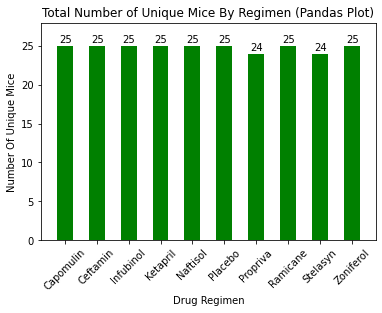

<Figure size 432x288 with 0 Axes>

In [195]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Get unique mice by drug regimen
unique_mice_by_regimen = clean_mouse_study_results.groupby("Drug Regimen")["Mouse ID"].nunique()

# Plot bar chart using Pandas save off the axis so I can annotate
ax = unique_mice_by_regimen.plot(kind="bar", color="green")

# Enumerate through the list mice by region and add annotations
for i, x in enumerate(unique_mice_by_regimen):
    ax.annotate(x, (i, x), xytext=(-6,3), textcoords='offset points')

# Ticks were already there but I want them at a 45 degree angle    
x_ticks = unique_mice_by_regimen.index.values
x_axis = np.arange(len(x_ticks))
plt.xticks(x_axis, x_ticks, rotation=45)

# Various other tweeks to make the graph look better
plt.title("Total Number of Unique Mice By Regimen (Pandas Plot)")
plt.ylabel("Number Of Unique Mice")
plt.ylim(0, max(unique_mice_by_regimen)+3)
plt.xlim(-0.75, len(unique_mice_by_regimen)-0.25)

# Show the graph
plt.show()
plt.tight_layout()

In [194]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
